# Project: Investigate a Dataset - No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Préparation des donnees</a></li>
<li><a href="#eda">Exploration des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
<li><a href="#References">References</a></li>  
</ul>

## Introduction

###  Description des données
L'ensemble des données a étudier est appelé No-show appointements.Cet ensemble de données recueille des information sur 100.000 rendez-vous au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques concernant le patient sont incluses dans chaque rangée.L'ensemble des données au premier regards comporte quatorze(14) attributs dont les details sont définis dans les lignes suivantes:

**PatientID**:Numéro d'identification unique de chaque patients

**AppointmentID**:Numéro d'identification du rendez-vous

**Gender**:Donne le sexe du patient

**Scheduledday**:Le jour du rendez-vous du patient

**Appointmentday**:Donne le jour du rendez-vous du patient

**Age**:Donne l'age du patient

**Neighbourhood**:Donne la localisation de l'hopital

**Scholarship**:Indique si oui ou non Le patient est inscrit à l'aide sociale brésilienne

**Hipertension**:Si oui ou non le patient est hypertendu

**Diabetes**:Si oui ou non le patient souffre de diabete

**Alcoholism**:Si oui ou non le patient est alcoolique

**Handcap**:Si oui ou non le patient est un handicapé

**SMS_received**:Le nombre de sms recu par le patient allant de 1....n

**No-show**:Indique si Oui ou Non le patient s'est présenté au rendez-vous



### Questions:

**Q1**:Quels sont les caractérisques les plus importantes pour predire si le patient sera ou pas à son rendez-vous?

**Q2**:Les patients inscrit à l'aide sociale respect-ils leurs rendez-vous?

**Q3**:Les patients souffrant de maladies cardiovasculaires(Hypertension,diabete) respectent-ils leur rendez-vous?

**Q4**:Quel est l'incidence des relance par sms sur la présence du patient au rendez-vous?

**Q5**:Quel est le sexe(homme ou femme) respectent-ils le plus leur rendez-Vous?




In [1]:
# Chargement des packages utiles à notre analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

## Préparation des données

Il s'agit dans cette section de recueillir dans un premier temps les donnees en suite de les evaluer afin de nous preparer à les nettoyer.

### Evaluation des données

In [2]:
#Téléchargement du fichier des données
df_no=pd.read_csv('noshowappointments.csv')
df_no.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_no.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
#Nombre d'echantillon et de colonnes dans l'ensemble des données
df_no.shape

(110527, 14)

**Inspection du nombre de valeurs nulles**

In [5]:
#Caracteristiques avec les valeurs manquantes
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Un apercu rapide nous montre qu'il n'ya aucune valeur manquante dans les données vérifions cela par la commande suivante:

In [6]:
# Nombre de ligne snon nulls par colonnes
df_no.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Aucune ligne n'a de valeurs nulles quelque soit l'attribut

**Inspection du nombre lignes doubles**

In [7]:
#Nombre de lignes dupliquées
df_no.duplicated().sum()

0

Aucune des lignes n'est dupliquée

**Inspection des types de donnees**

In [8]:
#Types par attributs
df_no.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

  Constat:

 **PatientID**,**Neighbourhood**,**AppointmentDay**,**AppointmentID**,**Age**,:Sont des attributs non pertinents pour notre analyse dont seront supprimees.

**Scheluledday**:Est de type object au lieu de date time en plus l'heure n'est pas pertinent dans notre analyse en plus il est non pertinent pour notre analyse.

Et il sera question pour nous de renommer les colonnes en francais.Donc dans la partie Nettoyage des donnees nous ferons les operations suivantes:**Suppression des attributs non pertinents pour l'analyse**(1),**Renommer les attributs des colonnes en francais**(2),**Correction des types**(3),et enfin **verifier la coherence des donnees**(4)


## Nettoyage des donnees

### Correction  des donnees

**1. Suppression des attributs non pertinents pour l'analyse**

In [9]:
#Suppression des attributs ScheduledDay,Neighbourhood,Neighbourhood,Age,
df_no.drop(['ScheduledDay','Neighbourhood','PatientId','Age','AppointmentDay','AppointmentID'],axis=1,inplace=True)

In [10]:
df_no.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,0,1,0,0,0,0,No
1,M,0,0,0,0,0,0,No
2,F,0,0,0,0,0,0,No
3,F,0,0,0,0,0,0,No
4,F,0,1,1,0,0,0,No


**2. Renommer les attributs des colonnes en francais**

In [11]:
#Renommer les attributs(Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show) en francais
columns_no=['Sexe','bourse','Hypertendu','Diabetique','Conso_Alcool','Handicape','Sms_recu','Presence']
df_no.columns=columns_no

In [12]:
df_no.head()

,Sexe,bourse,Hypertendu,Diabetique,Conso_Alcool,Handicape,Sms_recu,Presence
0,F,0,1,0,0,0,0,No
1,M,0,0,0,0,0,0,No
2,F,0,0,0,0,0,0,No
3,F,0,0,0,0,0,0,No
4,F,0,1,1,0,0,0,No


**3.verifier la coherence des donnees**

In [13]:
#Existence des valeurs nulles
df_no.isna().sum()


Sexe            0
bourse          0
Hypertendu      0
Diabetique      0
Conso_Alcool    0
Handicape       0
Sms_recu        0
Presence        0
dtype: int64

In [14]:
#Types des attributs
df_no.dtypes

Sexe            object
bourse           int64
Hypertendu       int64
Diabetique       int64
Conso_Alcool     int64
Handicape        int64
Sms_recu         int64
Presence        object
dtype: object

## Exploration des donnees

    Il s'agit dans cette section de faire une analyse de nos attributs individuellement(1) et d'analyser 
    les relations entre eux(2).

**1. Analyse indivuelle de chaque attribut(Univariée)**

La majorité des variables étant des variables qualitatives nous utiliserons pour se faire les histogrammes(hist) et des diagrammes en baton(bar) en pour analyser leur comportement.

In [15]:
#Définition de fonction value_no qui prends en entrée une colonne(a) et renvoie chacunes des categories de la colonne ainsi que leurs fréquences
def value_no(a):
        
    value=df_no[a].value_counts()
    
    return(value)   

Text(0, 0.5, 'frequence')

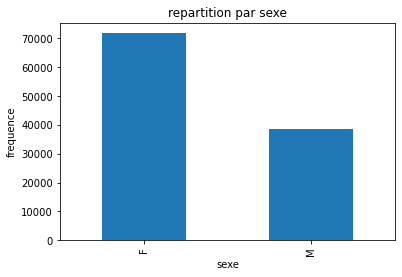

In [16]:
#Analyse de la répartition suivant le sexe
value_no('Sexe').plot(kind='bar')
plt.title('repartition par sexe')
plt.xlabel('sexe')
plt.ylabel('frequence')

Dans l'echantillon choisi les femmes sont plus nombreuses que les hommes.

Text(0, 0.5, 'frequence')

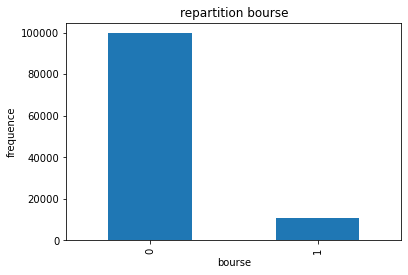

In [17]:
#Analyse de la répartition suivant la bourse
value_no('bourse').plot(kind='bar')
plt.title('repartition bourse')
plt.xlabel('bourse')
plt.ylabel('frequence')

L'analyse nous montre que dans l'echantillon choisi tres peu de personnes beneficie des allocations familliales du gouvernement

Text(0, 0.5, 'frequence')

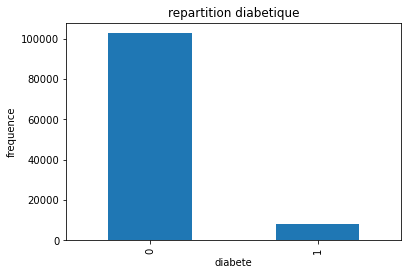

In [18]:
#Analyse de la répartition suivant le diabete
value_no('Diabetique').plot(kind='bar')
plt.title('repartition diabetique')
plt.xlabel('diabete')
plt.ylabel('frequence')

Tres peu de patients etudiés souffrent de diabete

Text(0, 0.5, 'frequence')

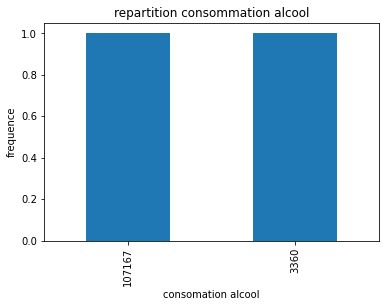

In [19]:
#Analyse de la répartition suivant la consommation d'alcool
value_no('Conso_Alcool').value_counts().plot(kind='bar')
plt.title('repartition consommation alcool')
plt.xlabel('consomation alcool')
plt.ylabel('frequence')

Tres peu de patients sont alcooliques dans notre échantillon

Text(0, 0.5, 'frequence')

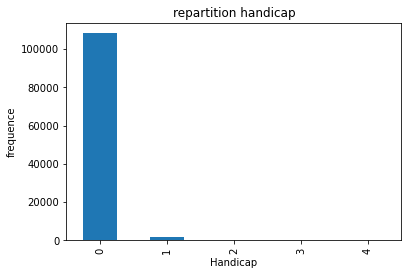

In [20]:
#Analyse de la répartition suivant l'handicap
value_no('Handicape').plot(kind='bar')
plt.title('repartition handicap')
plt.xlabel('Handicap')
plt.ylabel('frequence')

Le patients interrogés sont pratquement tous aptes.

Text(0, 0.5, 'frequence')

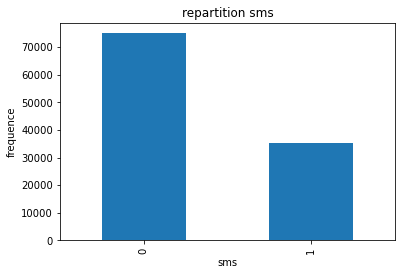

In [21]:
#Analyse de la répartition suivant les sms recu
value_no('Sms_recu').plot(kind='bar')
plt.title('repartition sms')
plt.xlabel('sms')
plt.ylabel('frequence')

Peu de personnes recoivent des sms de relance par rapport a leur rdv avec le medecin

Text(0, 0.5, 'frequence')

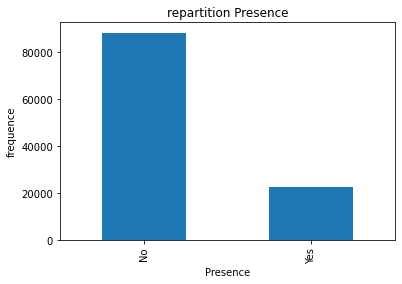

In [22]:
#Analyse de la répartition suivant la présence
value_no('Presence').plot(kind='bar')
plt.title('repartition Presence')
plt.xlabel('Presence')
plt.ylabel('frequence')

Il est evident que tres peu de personnes repondent présent a leur rdv.Il conveint de se demander quels sont les crières qui poussent les personnes a respecter éeelement leur rdv

**2.Analyse des relations entre les différentes variables**

In [23]:
#Repartition de attributs leur présence(presence=Yes)
df_no.groupby('Presence')['bourse','Hypertendu','Diabetique','Conso_Alcool','Handicape','Sms_recu'].sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_5772\1331297314.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_no.groupby('Presence')['bourse','Hypertendu','Diabetique','Conso_Alcool','Handicape','Sms_recu'].sum()


,bourse,Hypertendu,Diabetique,Conso_Alcool,Handicape,Sms_recu
Presence,,,,,,
No,8283,18029,6513,2683,2006,25698
Yes,2578,3772,1430,677,453,9784


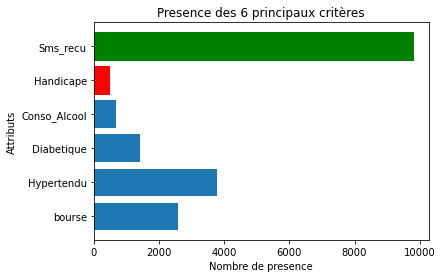

In [24]:
#Relation entre les attributs et le nombre de présence(ceux qui repondent présent aux rdv)
name=['bourse','Hypertendu','Diabetique','Conso_Alcool','Handicape','Sms_recu']
value=[2578,3772,1430,677,453,9784]
plt.title('Presence des 6 principaux critères')
plt.xlabel('Nombre de presence')
plt.ylabel('Attributs')
Bar_no=plt.barh(name,value)
Bar_no[5].set_color('green')
Bar_no[4].set_color('red')

On constate que ceux qui recoivent les sms sont plus reguliers a leur rendez-vous que les autres.Par ailleurs les handicapes sont ceux qui respectent le moins leur rendez-vous et pourtant comme le montre l'étude indivuel de l'echantillon des diabetique tres peu de patients souffrent de diabete.

In [25]:
#Relation entre la présence aux rdv et la bourse du gouvernement brézilien
df_no.groupby('Presence')['bourse'].sum()

Presence
No     8283
Yes    2578
Name: bourse, dtype: int64

Parmis les beneficiares des allocations familliales seul 23% des beneficaires des bourses repondent présent a leur rdv avec le docteur.Les allocations familiales ont donc une tres faible incidence sur le respect des rdv avec à l'hospital.Nous allons visualiser cela au travers du graphes si aprés.

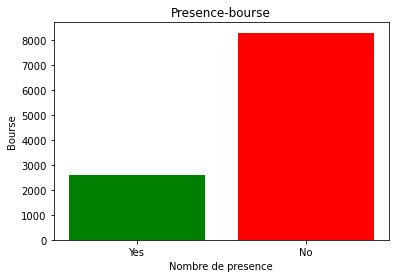

In [26]:
#Relation entre la présence aux rdv et la bourse du gouvernement brézilien
name=['Yes','No']
value=[2578,8283]
plt.title('Presence-bourse')
plt.xlabel('Nombre de presence')
plt.ylabel('Bourse')
Bar_no=plt.bar(name,value)
Bar_no[0].set_color('green')
Bar_no[1].set_color('red')

La bourse a une incidence minime sur le taux de presence car tres peu de gens qui recoivent la bourse respectent leur rdv.

In [27]:
#incidence des maladies cardio-vasculaires sur la présence
df_no.groupby('Presence')['Hypertendu','Diabetique','Conso_Alcool','Handicape'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_5772\1272741724.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_no.groupby('Presence')['Hypertendu','Diabetique','Conso_Alcool','Handicape'].sum()


,Hypertendu,Diabetique,Conso_Alcool,Handicape
Presence,,,,
No,18029,6513,2683,2006
Yes,3772,1430,677,453


Text(0.5, 1.0, 'MALADIES ET PRESENCE')

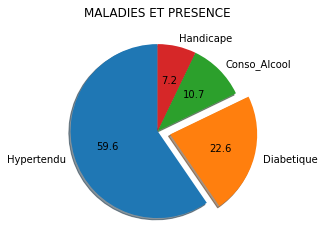

In [28]:
#Diagramme en camember des maladies cardiovasculaires(hypertension,diabete,Conso_Alcool,Handicape)
name=['Hypertendu','Diabetique','Conso_Alcool','Handicape']
data=[3772,1430,677,453]
explode=(0,0.15,0,0)
plt.pie(data,explode=explode,labels=name,autopct='%1.1f',startangle=90,shadow=True)
plt.title('MALADIES ET PRESENCE')

Les personnes souffrant d'hypertension par leurs pourcentage plus éléves(59.6%) sont ceux qui respectent le plus leur rendez-vous.Les personnes frappés par un handicap par contre sont ceux qui le respecte le moins.Cela peut etre du au manque de politiques sociales en faveur de la mobilité des handicapés.

In [29]:
#Relation entre les sms_recu et la présence aux consultations
df_no.groupby('Presence')['Sms_recu'].sum()

Presence
No     25698
Yes     9784
Name: Sms_recu, dtype: int64

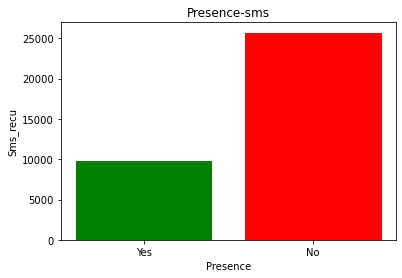

In [30]:
#Diagramme barre Presence-sms
name=['Yes','No']
value=[9784,25698]
plt.title('Presence-sms')
plt.xlabel('Presence')
plt.ylabel('Sms_recu')
Bar_no=plt.bar(name,value)
Bar_no[0].set_color('green')
Bar_no[1].set_color('red')


Les sms de relance recu ont une incidence certaine sur la présence aux rdv.Nous remarquons que 27% de personnes qui recoivent leur sms assistent a leur rdv.

In [33]:
#Regroupement des donnees de presence du sexe Masculin
df_no_hom=df_no.query('Sexe=="M"')
df1=df_no_hom.query('Presence=="Yes"')
df2=df_no_hom.query('Presence=="No"')
print(df1['Presence'].value_counts(),df2['Presence'].value_counts())

Yes    7725
Name: Presence, dtype: int64 No    30962
Name: Presence, dtype: int64


In [34]:
#Regroupement des donnees de presence du sexe feminine 
df_no_fem=df_no.query('Sexe=="F"')
df1=df_no_fem.query('Presence=="Yes"')
df2=df_no_fem.query('Presence=="No"')
print(df1['Presence'].value_counts(),df2['Presence'].value_counts())

Yes    14594
Name: Presence, dtype: int64 No    57246
Name: Presence, dtype: int64


Text(0, 0.5, 'proportion')

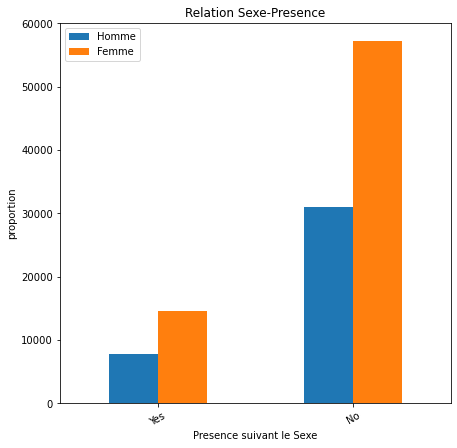

In [35]:
#Diagramme en barre selon le sexe(Relation entre le sexe et la présence aux rdv)
name=['Homme','Femme']
value_Homme=[7725,30962]
value_Femme=[14594,57246]
df_sex= pd.DataFrame({"Homme":value_Homme,"Femme":value_Femme})
df_sex.index = ["Yes","No"]
df_sex.plot(kind="bar",rot=30,figsize=(7,7)) # Cette fonction fabrique automatiquement un diagramme à barres regroupées à partir d'une dataframe (rot : orientation des étiquettes)
plt.title('Relation Sexe-Presence')
plt.xlabel('Presence suivant le Sexe')
plt.ylabel('proportion')

Il apparait que les Femmes respectent mieux leur rendez-vous que les hommes et ceci de facon significative meme si leur proportion est nettement moins que celles qui ne suivent pas.Cela a priori donnent l'impression que les femmes breziliennes sont plus regardantent sur leur santé que les hommes.

## Conclusion

Il convient dans cette section de répondre aux differentes questions posées:

**Q1**:Quels sont les caractérisques les plus importantes pour predire si le patient sera ou pas à son rendez-vous?
Les caractéristques les plus importantes sont les sms vient ensuite l'etat d'handicap.Ces deux facteurs selon notre étude jouent un role majeur dans le respect des rdv des patients.

**Q2**:Les patients inscrit à l'aide sociale respect-ils leurs rendez-vous?
Non l'aide sociale brezilienne n'est pas incitative au respect des rdv des patients.Elle a un role mineur selon les conclusions de notre analyse.

**Q3**:Les patients souffrant de maladies cardiovasculaires(Hypertension,diabete) respectent-ils leur rendez-vous?
Non pas vraiment mis a part les diabetiques le restent des patients demeurent tres peu respecteuse de leur rdv?

**Q4**:Quel est l'incidence des relance par sms sur la présence du patient au rendez-vous?
L'incidence bien que mineur est tout de meme supérieure aux autres attributs.Les relances par sms sont efficaces et ont un impact certain sur le respect des rdv des patients.

**Q5**:Quel est le sexe(homme ou femme) respectent-ils le plus leur rendez-Vous?
Les femmes demeures celles qui sont les plus présententa leurs rdv.Il apres selon notre etudes qu'elles sont plus nombreuses et en terme de proportion largement superieur aux hommes.Ceci peut expliquer ce chiffre.



## Limites

   Le choix du graphique est une premiere limite a notre analyse.les variables étant qualitative(booleennes) notre avons choisit comme outils de visualization le diagramme en barre,le diagramme en camember par exemple.Sauf qu'un graphique privilegie toujours des informations au détriments d'autres et l'oubli de certains éléments peuvent s'averer néfastes par la suite pour l'ananalyse et les interpretations.
   Nous avons également le choix de l'echantillon des differentes populations qui peuvent constituer des risques.En effet l'echantillon doit etre assez réprésenative de la population totale et rien ne nous dis que pour ces échantillons cela a été le cas.Il est possible que nous ayons manipulé des données erronées.
   

## references

-https://python.doctor/page-creer-graphiques-scientifiques-python-apprendre

-https://www.persee.fr/doc/ecoru_0013-0559_1983_num_157_1_2995

-https://moonbooks.org/Articles/Comment-tracer-un-histogramme-a-partir-des-colonnes-dune-dataframe-avec-pandas-/